In [56]:
import pandas as pd
import sys
sys.path.append('../Task 1/')
from efficient_apriori import apriori
from improved_apriori import Improved_Apriori
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import json
import ast

In [2]:
data = pd.read_csv('../Task 2/dataset/processed_book_output_shuffled.txt')
data = data[['username', 'title']]
data = data.groupby('username')['title'].apply(list)
data = data.to_dict()

In [3]:
# Step 2: Frequent Itemset Generation
# Use the apriori algorithm to generate frequent itemsets
#apriori = Improved_Apriori(data, min_support=0.4, min_confidence=1)
#frequent_itemsets = apriori.apriori()
#frequent_itemsets

100%|██████████| 78/78 [00:02<00:00, 35.33it/s]
0it [00:00, ?it/s]


{1: {('Angel Beats!',): 65303,
  ('Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.',): 49456,
  ('Another',): 51658,
  ('Ao no Exorcist',): 53028,
  ('Bakemonogatari',): 57273,
  ('Bleach',): 63861,
  ('Byousoku 5 Centimeter',): 47041,
  ('Clannad',): 63023,
  ('Clannad: After Story',): 50104,
  ('Code Geass: Hangyaku no Lelouch',): 71414,
  ('Code Geass: Hangyaku no Lelouch R2',): 58654,
  ('Cowboy Bebop',): 51706,
  ('Darker than Black: Kuro no Keiyakusha',): 51982,
  ('Death Note',): 85642,
  ('Durarara!!',): 59267,
  ('Elfen Lied',): 68075,
  ('Fairy Tail',): 53143,
  ('Fate/stay night',): 48914,
  ('Fullmetal Alchemist',): 61241,
  ('Fullmetal Alchemist: Brotherhood',): 67132,
  ('Highschool of the Dead',): 55774,
  ('Higurashi no Naku Koro ni',): 49684,
  ('K-On!',): 50388,
  ('Mahou Shoujo Madoka★Magica',): 48549,
  ('Mirai Nikki (TV)',): 57010,
  ('Naruto',): 66343,
  ('Naruto: Shippuuden',): 53626,
  ('Neon Genesis Evangelion',): 52984,
  ('No Game No Life',): 48171,


In [57]:
import ast

# Read the content from the file
with open('../Task 2/dataset/books_frequent_itemsets.txt', 'r') as file:
    content = file.read()

# Use ast.literal_eval to convert the string to a dictionary
data_dict = ast.literal_eval(content)

# Display the dictionary
print(data_dict)

{1: {('Lady Susan',): 171, ('Lord of the Flies, a Novel',): 356, ('Great Expectations',): 6287, ('Pride and Prejudice',): 4561, ('Adventures of Huckleberry Finn',): 458, ('The Poisonwood Bible',): 374, ("Cat's Cradle",): 3336, ('Catch 22',): 661, ("Cat's cradle (A Dell book)",): 165, ('An inquiry into the nature and causes of the wealth of nations,',): 932, ('An inquiry into the nature and causes of the wealth of nations',): 2695, ('Of Mice And Men',): 507, ('A Tree Grows in Brooklyn',): 661, ('Brave New World',): 1994, ('To Kill a Mocking Bird',): 3656, ('To Kill a Mockingbird',): 3705, ('And then there were none',): 258, ('Cry, the beloved country',): 135, ('Night',): 647, ('Lion, the Witch, and the Wardrobe',): 123, ('The Hobbit',): 4595, ('Fahrenheit 451',): 1628, ('Monte Cristo,',): 231, ('Of Mice and Men',): 2548, ('Dandelion Wine',): 235, ('Trojan Odyssey: A Dirk Pitt Novel',): 1026, ('Dracula (G. K. Hall (Large Print))',): 365, ("Alice's Adventures in Wonderland",): 441, ('1984

In [59]:
frequent_itemsets = data_dict

In [60]:
# Create a binary matrix
# Flatten the dictionary into a list of itemsets
itemsets = [itemset for level in frequent_itemsets.values() for itemset in level.keys()]

# Transactions 
transactions = list(data.values())

binary_matrix = pd.DataFrame(0, index=range(len(transactions)), columns=itemsets)

# Fill in the binary matrix
for i, transaction in enumerate(transactions):
    for itemset in itemsets:
        if set(itemset).issubset(transaction):
            binary_matrix.at[i, itemset] = 1  # Use 'at' instead of 'loc' for scalar indexing

binary_matrix


NameError: name 'data' is not defined

In [8]:
pca = PCA(n_components=2, random_state=42)
transformed_data = pca.fit_transform(binary_matrix)

In [13]:
def kmeans_elbow_method(data, max_k=10, figsize=(15, 8)):
    ssd = []
    silhouette_scores = []
    plt.figure(figsize=figsize)
    # Loop through different values of k
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        
        # Fit the k-means clustering model to the data
        kmeans.fit(data)
        
        # Calculate the sum of squared distances
        ssd.append(kmeans.inertia_)
        
        # Calculate the average silhouette score
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Sum of squared distances', color='b')
    ax1.plot(range(2, max_k+1), ssd, 'bo-')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Silhouette score', color='r')
    ax2.plot(range(2, max_k+1), silhouette_scores, 'ro-')
    
    fig.tight_layout()
    plt.show()

/Users/gx/Projects/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gx/Projects/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gx/Projects/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gx/Projects/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

<Figure size 1500x800 with 0 Axes>

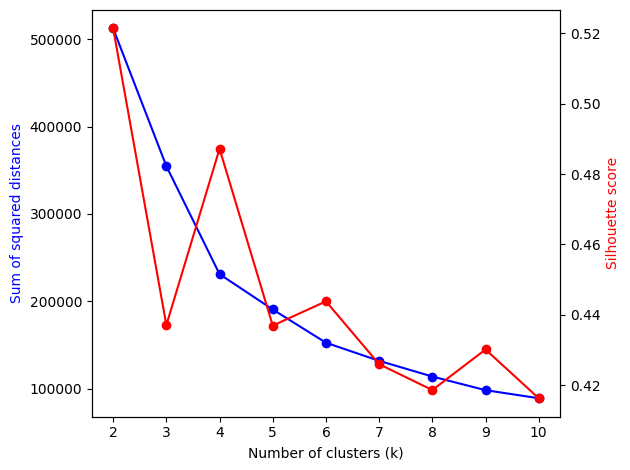

In [14]:
kmeans_elbow_method(transformed_data)

/Users/gx/Projects/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


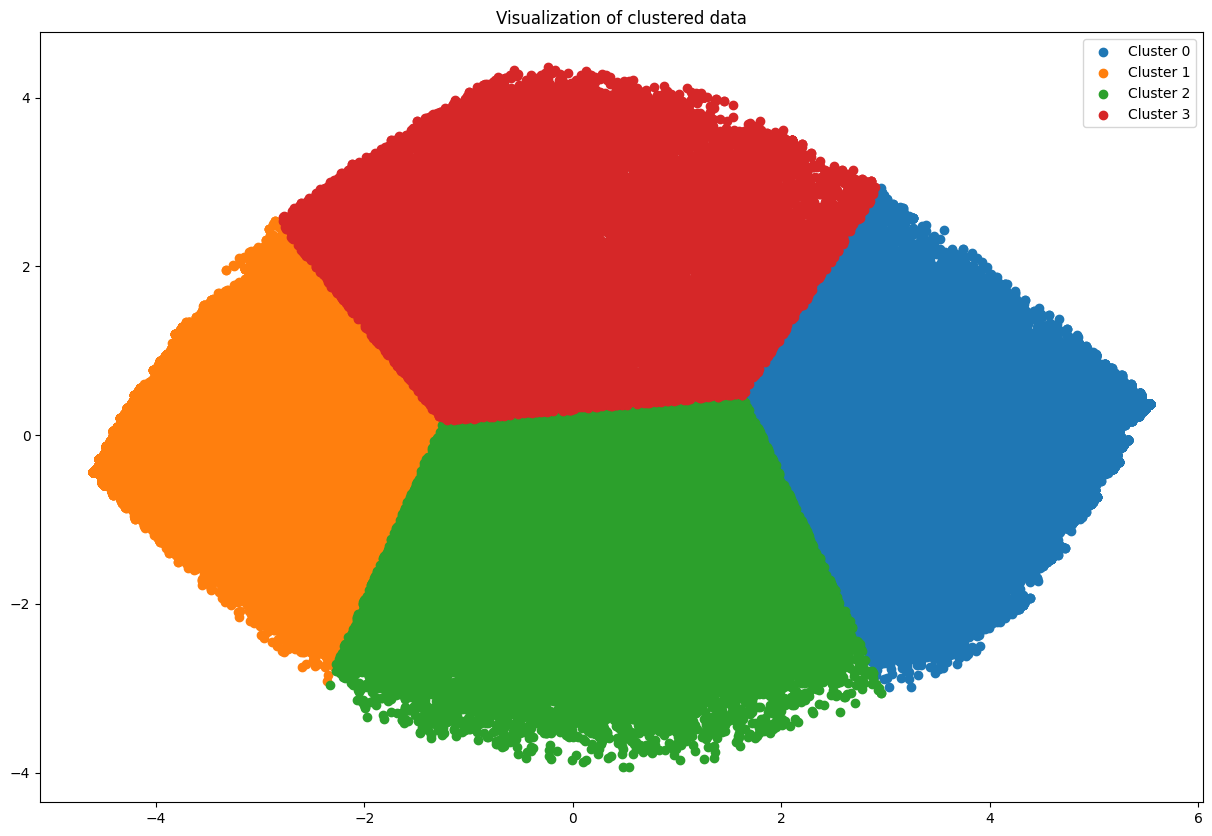

In [15]:
# Number of cluster for K-means to be 4 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(transformed_data)
cluster_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
#print(kmeans_centroids)
kmeans_silhouette = silhouette_score(transformed_data, cluster_labels)
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_data[cluster_labels == i, 0], transformed_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids

#plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered data')
plt.show()

In [16]:
binary_matrix['kmeans_cluster'] = cluster_labels

In [36]:
cluster1 = binary_matrix[binary_matrix['kmeans_cluster'] == 0]
cluster2 = binary_matrix[binary_matrix['kmeans_cluster'] == 1]
cluster3 = binary_matrix[binary_matrix['kmeans_cluster'] == 2]
cluster4 = binary_matrix[binary_matrix['kmeans_cluster'] == 3]
itemsets_in_cluster1 = [col for col in cluster1.columns if cluster1[col].sum() > 0]
itemsets_in_cluster2 = [col for col in cluster1.columns if cluster2[col].sum() > 0]
itemsets_in_cluster3 = [col for col in cluster1.columns if cluster3[col].sum() > 0]
itemsets_in_cluster4 = [col for col in cluster1.columns if cluster4[col].sum() > 0]


In [46]:
for i in range(4):
    print(f'Size of cluster {i+1}: {binary_matrix[binary_matrix["kmeans_cluster"] == i].shape[0]}')

Size of cluster 1: 33511
Size of cluster 2: 39186
Size of cluster 3: 23071
Size of cluster 4: 20356


In [48]:
# Interpreting the itemset frequencies in each cluster
cluster_itemset_frequencies = binary_matrix.groupby('kmeans_cluster').sum()
cluster_itemset_frequencies

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,31618,26335,27185,27124,28271,25810,22252,28763,24892,33099,...,22707,29940,30454,28471,29980,28567,29410,28353,31064,30329
1,7816,4810,5248,5628,6188,12463,6002,9067,6047,7878,...,7281,1965,3788,2094,1841,2864,1800,1198,448,1418
2,19079,14364,15168,13395,14349,8713,10690,15002,12002,11699,...,7046,14819,17460,14401,15068,15096,4977,4072,3745,12666
3,6790,3947,4057,6881,8465,16875,8097,10191,7163,18738,...,13388,3052,3379,2317,2197,2056,14913,12991,12392,3264


In [66]:
binary_matrix

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)",kmeans_cluster
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,0,0,0,1,2
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,0
116122,1,1,1,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,2


In [87]:
import ast
binary_matrix['anime_level'] = binary_matrix.apply(lambda row: max([len(col) for col, val in row.items() if val == 1 and col != 'kmeans_cluster' and col!='anime_level'], default=0), axis=1)
binary_matrix


,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)",kmeans_cluster,anime_level
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,3,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,0,0,0,1,2,3
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,2
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,3
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,0,3
116122,1,1,1,0,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,2,2


In [88]:
cols = binary_matrix.loc[binary_matrix['anime_level'] == 11].columns

In [89]:
cluster_anime_level_counts = binary_matrix.groupby(['kmeans_cluster', 'anime_level']).size()
cluster_anime_level_counts

kmeans_cluster  anime_level
0               2                132
                3              33379
1               0               2705
                1               7606
                2              24916
                3               3959
2               2               8287
                3              14784
3               2               2222
                3              18134
dtype: int64

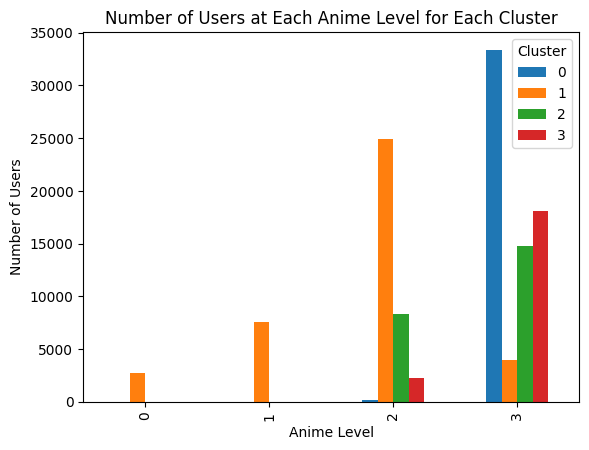

In [90]:
df_counts = cluster_anime_level_counts.reset_index(name='counts')

df_pivot = df_counts.pivot(index='anime_level', columns='kmeans_cluster', values='counts')

# Replace NaN values with 0
df_pivot.fillna(0, inplace=True)

# Create a bar plot
df_pivot.plot.bar()

# Add labels and title
plt.xlabel('Anime Level')
plt.ylabel('Number of Users')
plt.title('Number of Users at Each Anime Level for Each Cluster')
plt.legend(title='Cluster')

# Show the plot
plt.show()